In [72]:
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [73]:
df = pd.read_csv("D:GC/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [74]:

df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

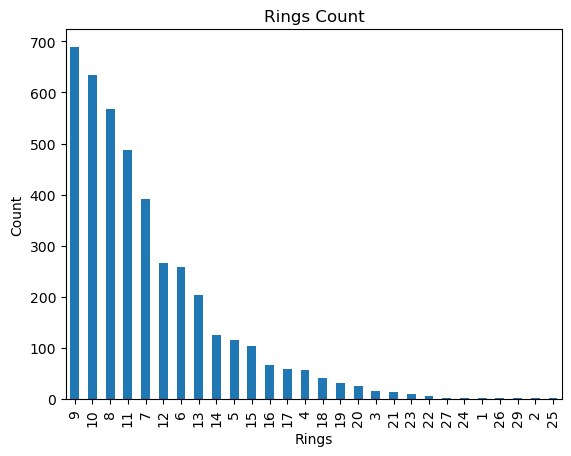

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['Rings'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Rings Count')
plt.xlabel('Rings')
plt.ylabel('Count')

In [76]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df['Sex']=label_encoder.fit_transform(df['Sex'])
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [77]:
df=df.drop('id',axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [78]:
X=df.drop('Rings',axis=1)
y=df['Rings']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.25, 
                                                    random_state = 21)

In [80]:
import numpy as np
train_classes = np.unique(y_train)
test_classes = np.unique(y_test)

print("훈련 데이터의 고유 클래스:", train_classes)
print("테스트 데이터의 고유 클래스:", test_classes)

훈련 데이터의 고유 클래스: [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27]
테스트 데이터의 고유 클래스: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 29]


In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3132, 8), (1045, 8), (3132,), (1045,))

In [82]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [83]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test]

In [84]:
n_step = 3 

X_train_seq, y_train_seq = split_sequences(train_set, n_step)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_sequences(test_set, n_step)
print(X_test_seq.shape, y_test_seq.shape)

(3130, 3, 8) (3130,)
(1043, 3, 8) (1043,)


In [85]:
from keras.utils import to_categorical
# Convert output variables to categorical for CNN
num_classes = 30

# 훈련 데이터 및 테스트 데이터에 대해 동일한 클래스 수 사용
y_train_seq = to_categorical(y_train_seq,num_classes=num_classes)  #num_classes로 지정해주지 않을경우 27이나옴
print(y_train_seq.shape)

y_test_seq = to_categorical(y_test_seq, num_classes=num_classes) #num_classes로 지정해주지 않을경우 29가나옴
print(y_test_seq.shape)

(3130, 30)
(1043, 30)


In [86]:
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

3 8 30


In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D

In [88]:
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model.summary()

C:\Users\toxh1\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 128)                 │          70,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,526 (353.62 KB)

 Trainable params: 90,526 (353.62 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:

history = model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 256, validation_split = 0.1, shuffle = True)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1183 - loss: 3.3338 - val_accuracy: 0.1757 - val_loss: 3.0685
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1828 - loss: 2.9438 - val_accuracy: 0.1757 - val_loss: 2.6058
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1756 - loss: 2.5761 - val_accuracy: 0.1949 - val_loss: 2.5220
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1727 - loss: 2.5195 - val_accuracy: 0.1757 - val_loss: 2.5096
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1838 - loss: 2.4858 - val_accuracy: 0.1757 - val_loss: 2.4988
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1783 - loss: 2.4872 - val_accuracy: 0.1757 - val_loss: 2.4813
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1826 - loss: 2.4623 - val_accuracy: 0.1629 - val_loss: 2.4676
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1553 - loss: 2.4587 - val_accuracy: 0.1086 - val_loss

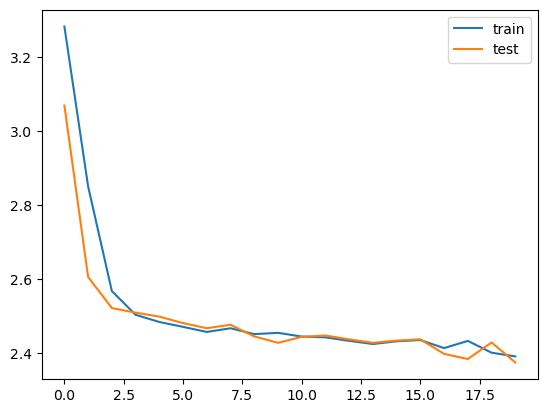

In [91]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [92]:

model.evaluate(X_train_seq, y_train_seq)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1961 - loss: 2.3896


[2.371419906616211, 0.19712460041046143]

In [93]:

model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1892 - loss: 2.4111


[2.3664047718048096, 0.18504314124584198]

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix


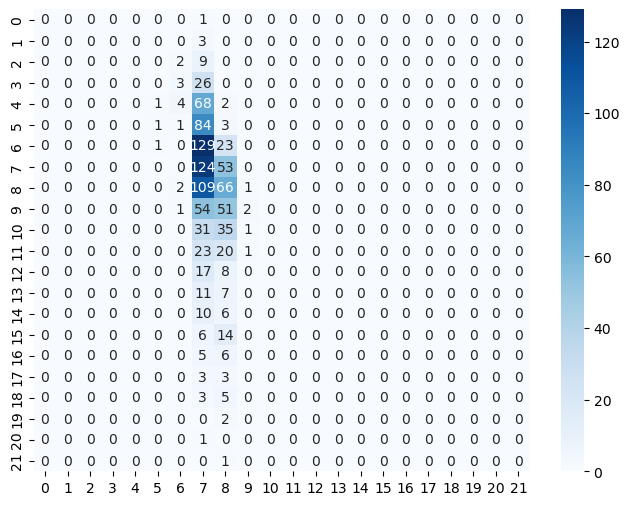

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [96]:
base_loss,base_accuracy=model.evaluate(X_test_seq, y_test_seq)

model_file='D:GC/abalone_model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1892 - loss: 2.4111


model saved at  D:GC/abalone_model.h5
Accuracy >18.504314
Base Loss >2.37


In [97]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [98]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1892 - loss: 2.4111 


[2.3664047718048096, 0.18504314124584198]

In [100]:

base_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1892 - loss: 2.4111


[2.3664047718048096, 0.18504314124584198]

In [101]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [105]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(64, activation='relu'))  # 기존 출력층 앞의 레이어 대신 추가

# 최종 출력층 추가 (예: 10개의 클래스)
new_model.add(layers.Dense(30, activation='softmax'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 30)                  │          90,526 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,460 (368.98 KB)

 Trainable params: 3,934 (15.37 KB)

 Non-trainable params: 90,526 (353.62 KB)

In [106]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Sequential name=sequential_6, built=True>",sequential_6,False
1,"<Dense name=dense_16, built=True>",dense_16,True
2,"<Dense name=dense_17, built=True>",dense_17,True


In [107]:

history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0955 - loss: 3.2967 - val_accuracy: 0.1022 - val_loss: 2.8045
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1166 - loss: 2.6657 - val_accuracy: 0.1757 - val_loss: 2.4821
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1923 - loss: 2.4662 - val_accuracy: 0.1757 - val_loss: 2.4533
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1885 - loss: 2.4359 - val_accuracy: 0.1757 - val_loss: 2.4424
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1889 - loss: 2.4321 - val_accuracy: 0.1757 - val_loss: 2.4322
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1788 - loss: 2.4161 - val_accuracy: 0.1757 - val_loss: 2.4222
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1845 - loss: 2.4151 - val_accuracy: 0.1757 - val_loss: 2.4151
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1808 - loss: 2.3917 - val_accuracy: 0.1757 - val_loss:

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 30)                  │          90,526 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,330 (399.73 KB)

 Trainable params: 3,934 (15.37 KB)

 Non-trainable params: 90,526 (353.62 KB)

 Optimizer params: 7,870 (30.75 KB)

In [109]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2337 - loss: 2.3634


[2.311095714569092, 0.21188877522945404]

In [110]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [111]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Sequential name=sequential_6, built=True>",sequential_6,True
1,"<Dense name=dense_16, built=True>",dense_16,True
2,"<Dense name=dense_17, built=True>",dense_17,True


In [112]:
history3 = new_model.fit(X_train_seq, y_train_seq, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2113 - loss: 2.2735 - val_accuracy: 0.2077 - val_loss: 2.2418
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2175 - loss: 2.2642 - val_accuracy: 0.2204 - val_loss: 2.2150
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2185 - loss: 2.2232 - val_accuracy: 0.1981 - val_loss: 2.1949
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 2.2290 - val_accuracy: 0.2204 - val_loss: 2.2156
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2180 - loss: 2.2343 - val_accuracy: 0.2204 - val_loss: 2.1598
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2377 - loss: 2.1830 - val_accuracy: 0.2428 - val_loss: 2.1609
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2197 - loss: 2.1690 - val_accuracy: 0.2556 - val_loss: 2.1337
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2362 - loss: 2.1531 - val_accuracy: 0.1917 - val_loss:

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 30)                  │          90,526 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,382 (1.08 MB)

 Trainable params: 94,460 (368.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 188,922 (737.98 KB)

In [114]:
new_model.evaluate(X_test_seq, y_test_seq)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2645 - loss: 2.1233


[2.0776004791259766, 0.26366251707077026]